In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as skl
import sklearn.preprocessing as skp
import sklearn.metrics as skm
import patsy
import patsylearn
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import graphviz
from sklearn.metrics import make_scorer
from sklearn.model_selection import learning_curve
from sklearn.inspection import DecisionBoundaryDisplay


In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train['Pclass'] = df_train['Pclass'].astype(str)
df_test['Pclass'] = df_test['Pclass'].astype(str)

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [4]:
df_train.shape

(891, 12)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [6]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
df_train.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_train.duplicated().any()

False

In [9]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [10]:
df_train.count()/df_train.shape[0]

PassengerId    1.000000
Survived       1.000000
Pclass         1.000000
Name           1.000000
Sex            1.000000
Age            0.801347
SibSp          1.000000
Parch          1.000000
Ticket         1.000000
Fare           1.000000
Cabin          0.228956
Embarked       0.997755
dtype: float64

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

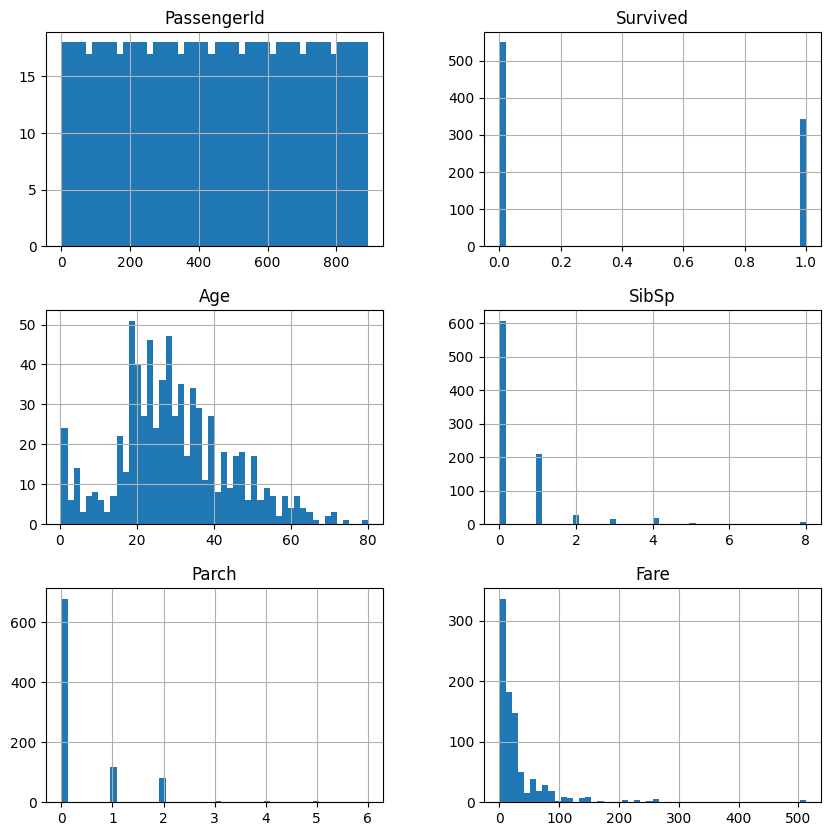

In [11]:
df_train.hist(bins = 50, figsize=(10,10))

In [12]:
imp = SimpleImputer(strategy='median')
imp.fit(df_train[['Age']])
df_train['Age'] = imp.transform(df_train[['Age']])
df_test['Age'] = imp.transform(df_test[['Age']])

imp.fit(df_train[['Fare']])
df_test['Fare'] = imp.transform(df_test[['Fare']])

imp = SimpleImputer(strategy='most_frequent')
imp.fit(df_train[['Embarked']])
df_train['Embarked'] = imp.transform(df_train[['Embarked']])

In [13]:
df_train.count()/df_train.shape[0]

PassengerId    1.000000
Survived       1.000000
Pclass         1.000000
Name           1.000000
Sex            1.000000
Age            1.000000
SibSp          1.000000
Parch          1.000000
Ticket         1.000000
Fare           1.000000
Cabin          0.228956
Embarked       1.000000
dtype: float64

In [14]:
X_train = df_train.drop(columns = ['Survived'])
y_train = df_train['Survived']
X_test = df_test


In [15]:
X_train.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    object 
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 76.7+ KB


In [17]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    object 
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 36.0+ KB


In [18]:
df_test.count()/df_test.shape[0]

PassengerId    1.000000
Pclass         1.000000
Name           1.000000
Sex            1.000000
Age            1.000000
SibSp          1.000000
Parch          1.000000
Ticket         1.000000
Fare           1.000000
Cabin          0.217703
Embarked       1.000000
dtype: float64

In [19]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [20]:
df = df_train[['Survived', 'Pclass', 'Sex', 'Age',
       'Parch', 'Fare', 'Embarked']]
X = df.drop(columns = ['Survived'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
X_train = pd.get_dummies(X_train)

In [22]:
X_test = pd.get_dummies(X_test)

In [65]:
X = pd.get_dummies(X)

In [92]:
X_train.isna().count()

Age           596
Parch         596
Fare          596
Pclass_1      596
Pclass_2      596
Pclass_3      596
Sex_female    596
Sex_male      596
Embarked_C    596
Embarked_Q    596
Embarked_S    596
dtype: int64

In [38]:
clf = DecisionTreeClassifier(max_depth = 10)

In [39]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [45]:
parameters = {'max_depth':[1,2,3,5,4,6,7,8,9,10,15,20,25,30], 'criterion' :['gini', 'entropy', 'log_loss'], 'splitter' : ['best', 'random']}

In [83]:
grid_clf = GridSearchCV(DecisionTreeClassifier(), parameters).fit(X_train, y_train)

In [84]:
grid_clf.best_params_

{'criterion': 'log_loss', 'max_depth': 5, 'splitter': 'random'}

In [85]:
grid_clf.best_estimator_.score(X_test, y_test)

0.8

In [86]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=grid_clf.best_estimator_,
    X=X_train,
    y=y_train,
    cv=5,
    scoring="accuracy",
    train_sizes = [5, 50, 100, 200, 300, 400, 450]
)

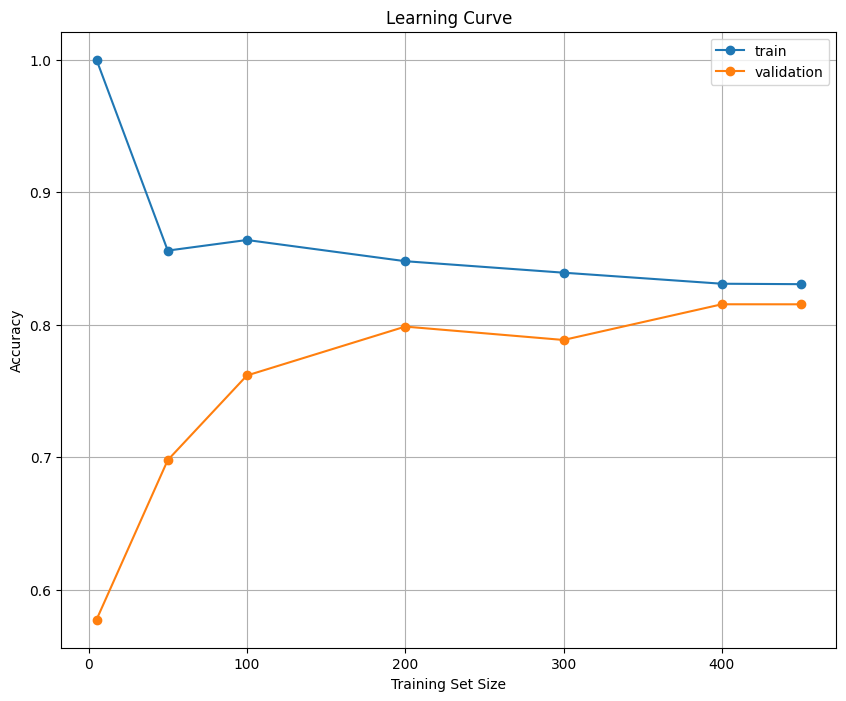

In [87]:
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train", marker='o')
plt.plot(train_sizes, test_mean, label="validation", marker='o')

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [88]:
from sklearn.tree import export_graphviz
export_graphviz(grid_clf.best_estimator_, out_file="titanic_tree.dot", 
                feature_names=X_train.columns,
                class_names=['dead','alive'], 
                rounded=True, filled=True)

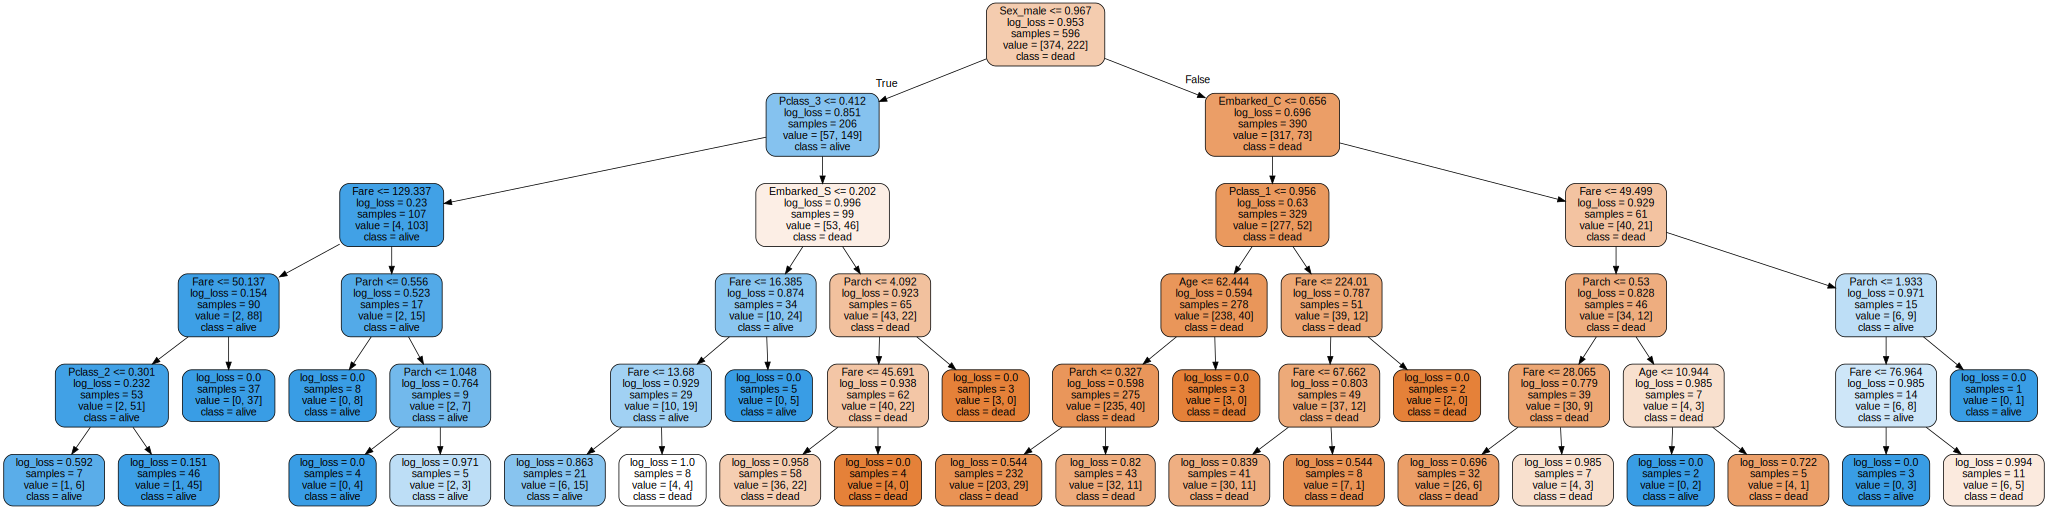

In [89]:
with open("titanic_tree.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

In [97]:
X_train.isna().count()

Age           596
Parch         596
Fare          596
Pclass_1      596
Pclass_2      596
Pclass_3      596
Sex_female    596
Sex_male      596
Embarked_C    596
Embarked_Q    596
Embarked_S    596
dtype: int64

In [98]:
X_train.head(5)

,Age,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
6,54.0,0,51.8625,1,0,0,0,1,0,0,1
718,28.0,0,15.5000,0,0,1,0,1,0,1,0
685,25.0,2,41.5792,0,1,0,0,1,1,0,0
73,26.0,0,14.4542,0,0,1,0,1,1,0,0
882,22.0,0,10.5167,0,0,1,1,0,0,0,1


KeyError: "['Pclass'] not in index"

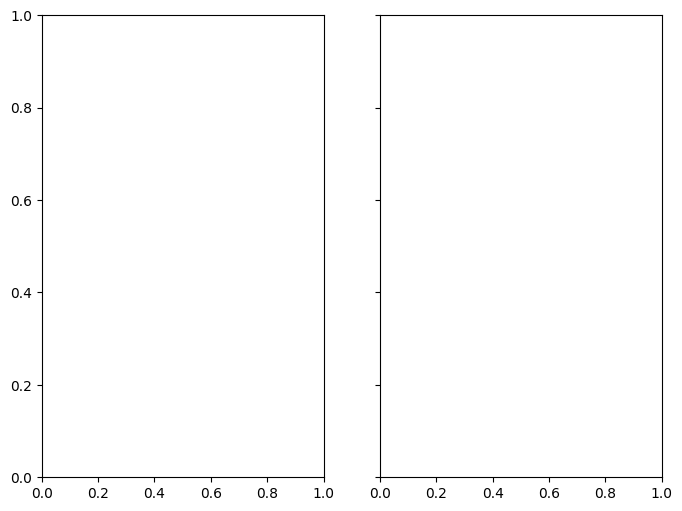

In [99]:
from sklearn.inspection import DecisionBoundaryDisplay
# Plotting decision regions
f, ((ax1,ax2)) = plt.subplots(1, 2, sharex="col", sharey="row", figsize=(8, 6))

DecisionBoundaryDisplay.from_estimator(
        grid_clf.best_estimator_, X_train[['Fare', 'Pclass']], alpha=0.4, ax=ax2, response_method="predict"
    )

ax1.scatter(X_train["Fare"], X_train["Pclass"], c=y, s=20, edgecolor="k")


ax2.scatter(X_train["Fare"], X_train["Pclass"], c=y, s=20, edgecolor="k")

plt.show()

In [29]:
formula = 'Pclass * Sex * Age * SibSp * Parch * Fare * Embarked'

In [30]:
patsify = patsylearn.PatsyTransformer(formula)

In [31]:
patsify.fit(X_train)
X_train = patsify.transform(X_train)
X_test = patsify.transform(df_test)

PatsyError: Error evaluating factor: NameError: name 'Embarked' is not defined
    Pclass * Sex * Age * SibSp * Parch * Fare * Embarked
                                                ^^^^^^^^

In [ ]:
pd.DataFrame(df_test)['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

In [ ]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,278,279,280,281,282,283,284,285,286,287
0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
887,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
888,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1313.2,0.0,0.0,0.0,0.0,0.0,0.0
889,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
LR = skl.LogisticRegression()

In [ ]:
LR.fit(X_train, y_train)

/home/jerome/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = LR.predict(X_train)

In [ ]:
skm.accuracy_score(y_train, y_pred)

0.8294051627384961